In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [2]:
## Read csvs
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)


## Handle missing values
train_df.fillna('NA', inplace=True)
test_df.fillna('NA', inplace=True)

## Data Vizulasiation

0    10549
3     6036
2     4874
1     3607
Name: label, dtype: int64


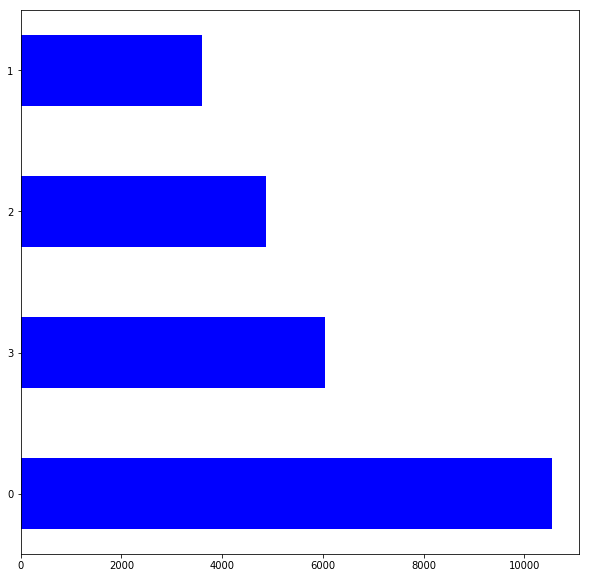

In [3]:
## Plot the number of each categories
count_df = train_df['label'].value_counts()
labels = count_df.index.to_numpy().astype(str)
count = count_df.values.tolist()

print(count_df)

fig = plt.figure(figsize=(10,10))
plt.barh(labels, count, height=0.5, color='blue')
plt.show()

In [4]:
## Print value of features
print(train_df['bcced'].value_counts())

0    25030
1       36
Name: bcced, dtype: int64


It seems this feature is not useful at all as date and bcced

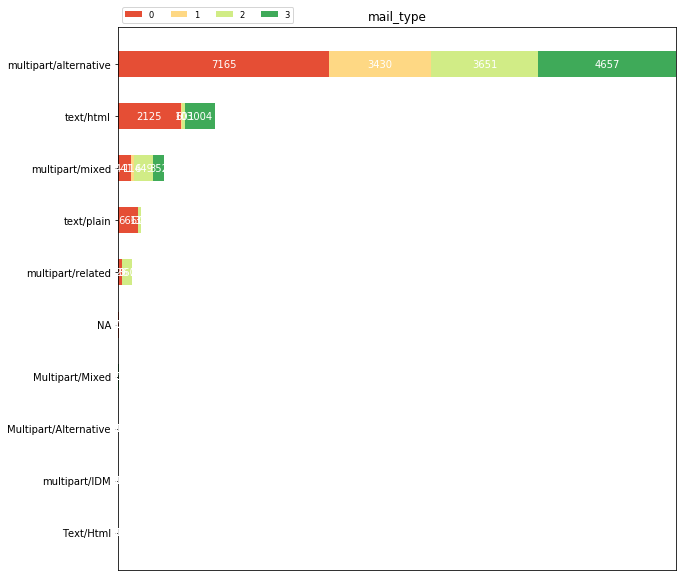

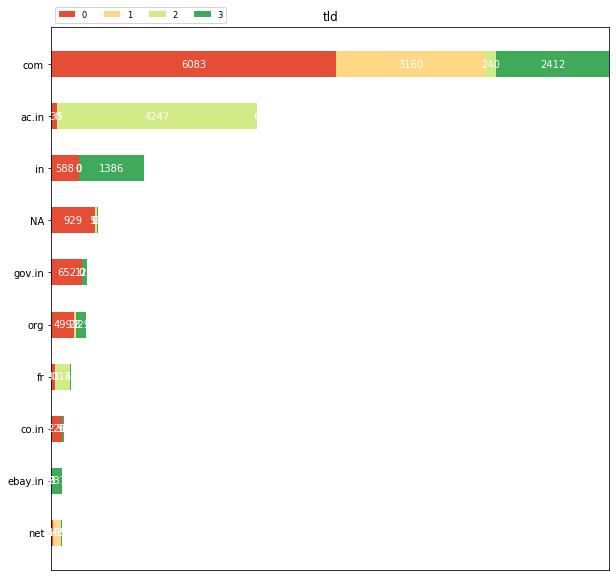

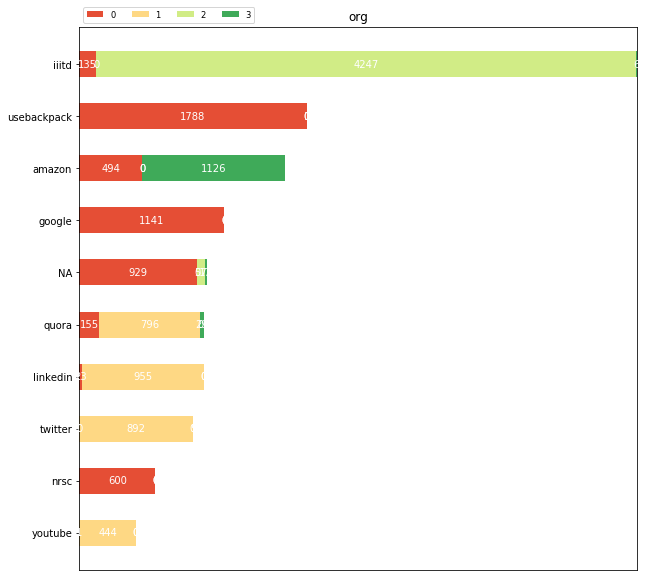

In [5]:
features = ['mail_type', 'tld', 'org']

def create_dict_categories(feature):
    listCategState=np.array(train_df[[feature, 'label']])
    dictCategState={}

    helper={'0':[1,0,0,0] , '1':[0,1,0,0] , '2':[0,0,1,0] , '3':[0,0,0,1]}

    for x in listCategState:
        if x[0] not in dictCategState.keys():
            dictCategState[x[0]]=helper[str(x[1])]
        else:
            temp=dictCategState[x[0]]
            dictCategState[x[0]]=list(map(sum, zip(temp, helper[str(x[1])]))) #sum of two lists element-wise, nothing more

    listTuples=[(x,dictCategState[x]) for x in dictCategState.keys()]
    rankedCategories=sorted(listTuples,key=lambda category : sum(category[1]), reverse=True)
    dictBestCateg=dict(rankedCategories[:10])
    
    return dictBestCateg
        
def survey(results, category_names):
    """
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title(feature)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


for feature in features:
    dictBestCateg = create_dict_categories(feature)
    survey(dictBestCateg, ['0', '1', '2', '3']) 
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11814c190>,
      dtype=object)

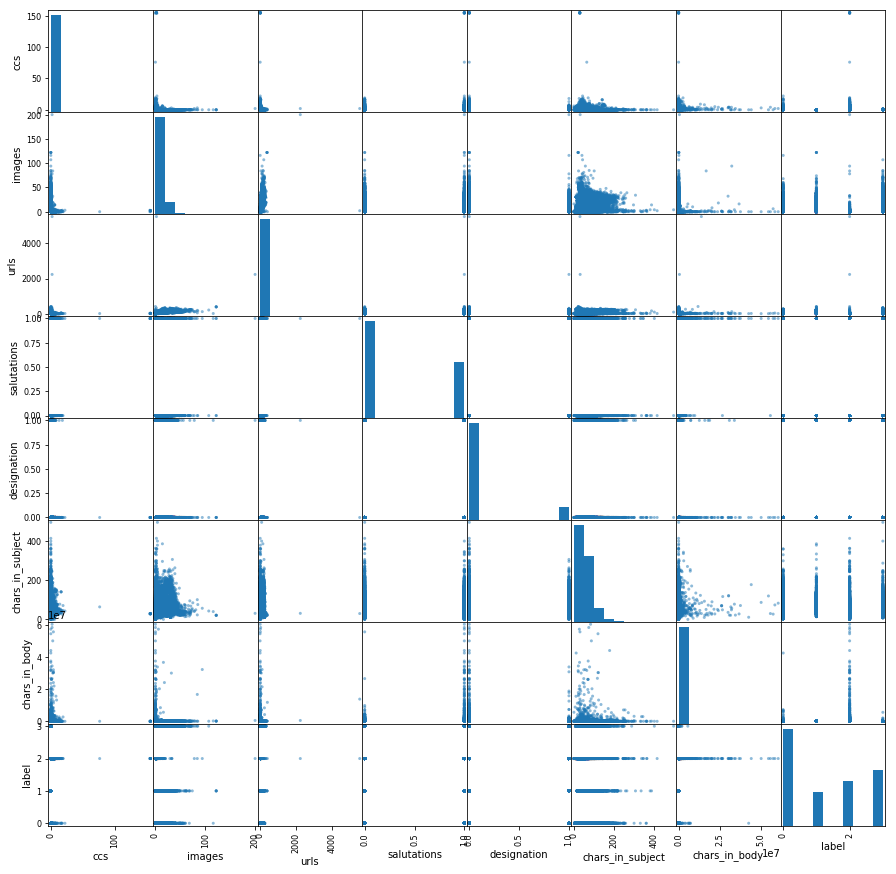

In [8]:
## Plot scatter matrix
from pandas.plotting import scatter_matrix as sm

clean_train_df = train_df.drop(['date', 'bcced'], axis=1)

sm(clean_train_df, diagonal='hist', figsize=(15,15))